In [1]:
import cosima_cookbook as cc
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm

from dask.distributed import Client

%matplotlib inline

In [2]:
client = Client()
display(client)

Client Scheduler: tcp://127.0.0.1:38129 Dashboard: /proxy/40919/status,Cluster Workers: 4 Cores: 4 Memory: 17.18 GB


In [3]:
dbs = ['/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments.db',
       '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_1.db',
       '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_2.db',  
       '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_3.db',
       '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_experiments_b.db',
       '/scratch/e14/cy8964/access-om2/archive/databases/1deg_jra55_ryf_humidity.db']

# Experiments_3 has the cwcw/wcwc experiments
session = cc.database.create_session(dbs[3])

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,1deg_jra55_ryf_RCPwarmhumid,1487
1,1deg_jra55_ryf_RCPcont,2134
2,1deg_jra55_ryf_RCPcoolhumid,1487
3,mask,1
4,1deg_jra55_ryf_RCPwcwc,2134
5,1deg_jra55_ryf_RCPcwcw,2134


In [5]:
wcwc_expt = '1deg_jra55_ryf_RCPwcwc'
cwcw_expt = '1deg_jra55_ryf_RCPcwcw'
wcwc = cc.querying.get_variables(session, experiment=wcwc_expt)
cwcw = cc.querying.get_variables(session, experiment=cwcw_expt)

cwcw[cwcw['name'].str.lower().str.match('temp')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
4,TEMP,TEMP,None,restart110/ice/monthly_sstsss.nc,7,None,None
210,temp,Conservative temperature,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
211,temp_advection,cp*rho*dzt*advection tendency,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
212,temp_eta_smooth,surface smoother for temp,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
213,temp_global_ave,Global mean temp in liquid seawater,1 monthly,output114/ocean/ocean_scalar.nc,16,2890-01-01 00:00:00,3050-01-01 00:00:00
214,temp_nonlocal_KPP,cp*rho*dzt*nonlocal tendency from KPP,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
215,temp_rivermix,cp*rivermix*rho_dzt*temp,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
216,temp_sigma_diff,thk wghtd sigma-diffusion heating,1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
217,temp_submeso,rho*dzt*cp*submesoscale tendency (heating),1 monthly,output114/ocean/ocean_heat.nc,15,2900-01-01 00:00:00,3050-01-01 00:00:00
218,temp_surface_ave,Global mass weighted mean surface temp in liqu...,1 monthly,output114/ocean/ocean_scalar.nc,16,2890-01-01 00:00:00,3050-01-01 00:00:00


In [6]:
# Getting temperature fields for whole experiment, storing it in a dictionary

temp = 'temp'
years = ['{}-{}'.format(i,i+9) for i in range(2900,3050,10)]
ncfile_output_names = ['0{}'.format(i) for i in range(0,10)] + ['1{}'.format(i) for i in range(0,5)]

temp_cwcw_dict = {years[i]:cc.querying.getvar(cwcw_expt, temp, session, ncfile='output1{}/ocean/ocean_heat.nc'.format(ncfile_output_names[i])) for i in range(len(years))}
temp_wcwc_dict = {years[i]:cc.querying.getvar(wcwc_expt, temp, session, ncfile='output1{}/ocean/ocean_heat.nc'.format(ncfile_output_names[i])) for i in range(len(years))}

In [7]:
temp_global_ave = 'temp_global_ave'
temp_global_ave_cwcw_dict = {years[i]:cc.querying.getvar(cwcw_expt, temp_global_ave, session, ncfile='output1{}/ocean/ocean_scalar.nc'.format(ncfile_output_names[i])) for i in range(len(years))}
temp_global_ave_wcwc_dict = {years[i]:cc.querying.getvar(wcwc_expt, temp_global_ave, session, ncfile='output1{}/ocean/ocean_scalar.nc'.format(ncfile_output_names[i])) for i in range(len(years))}

In [8]:
temp_global_ave_cwcw = np.concatenate([temp_global_ave_cwcw_dict[years[i]] for i in range(len(years))])
temp_global_ave_cwcw_ann = np.array([np.mean(temp_global_ave_cwcw[i:i+12,0]) for i in range(0, 1800, 12)])
temp_global_ave_wcwc = np.concatenate([temp_global_ave_wcwc_dict[years[i]] for i in range(len(years))])
temp_global_ave_wcwc_ann = np.array([np.mean(temp_global_ave_wcwc[i:i+12,0]) for i in range(0, 1800, 12)])

In [16]:
temp_cwcw_dict

{'2900-2909': <xarray.DataArray 'temp' (time: 120, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
 dask.array<open_dataset-2c4e4f3bb4c0d7a68a0b2b7f88c841e6temp, shape=(120, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
 Coordinates:
   * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
   * yt_ocean  (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
   * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 5.034e+03 5.254e+03
   * time      (time) object 2900-01-16 12:00:00 ... 2909-12-16 12:00:00
 Attributes:
     long_name:      Conservative temperature
     units:          K
     valid_range:    [-10. 500.]
     cell_methods:   time: mean
     time_avg_info:  average_T1,average_T2,average_DT
     coordinates:    geolon_t geolat_t
     standard_name:  sea_water_conservative_temperature,
 '2910-2919': <xarray.DataArray 'temp' (time: 120, st_ocean: 50, yt_ocean: 300, xt_ocean: 360)>
 dask.array<open_dataset-ed8df7

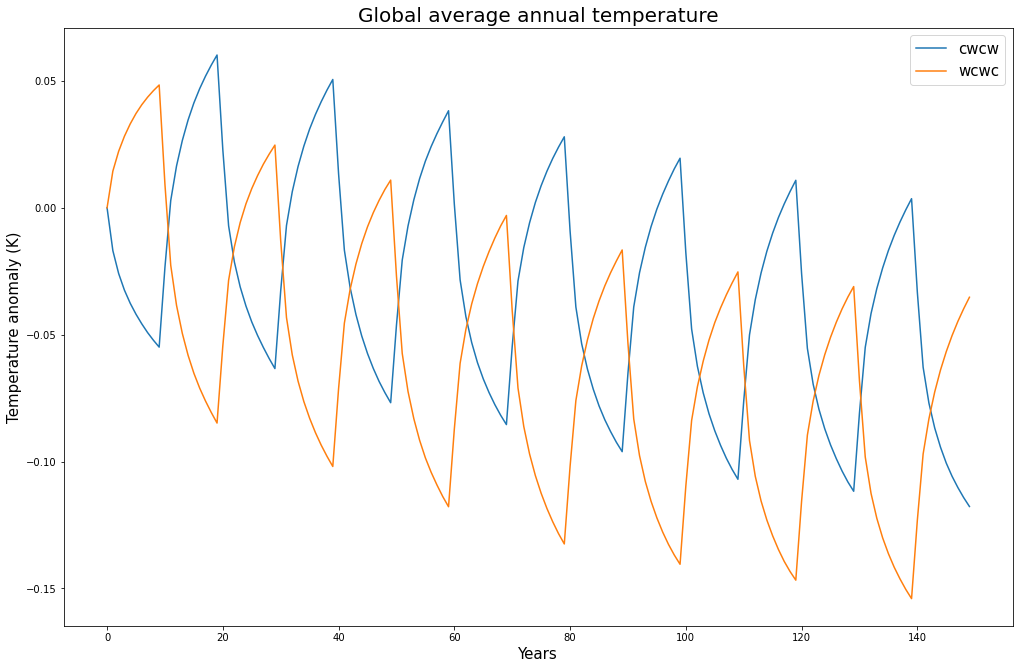

In [10]:
plt.figure(figsize=(17,11))
plt.plot(temp_global_ave_cwcw_ann-temp_global_ave_cwcw_ann[0],label='cwcw')
plt.plot(temp_global_ave_wcwc_ann-temp_global_ave_wcwc_ann[0],label='wcwc')
plt.title('Global average annual temperature', fontsize=20)
plt.ylabel('Temperature anomaly (K)',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.legend(fontsize=15)
#plt.savefig('Sawtooth')

In [12]:
# Plots

lat = -30

### Zonal ave, 30S

# temp_year1 = temp_cwcw_dict[years[0]].isel(time = slice(0,12)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year2 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*1,12+12*1)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year3 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*2,12+12*2)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year10 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year11 = temp_cwcw_dict[years[1]].isel(time = slice(0,12)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year12 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*1,12+12*1)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year13 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*2,12+12*2)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year20 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')


### Zonal ave, meridional ave

# temp_year1 = temp_cwcw_dict[years[0]].isel(time = slice(0,12)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year2 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*1,12+12*1)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year3 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*2,12+12*2)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year10 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year11 = temp_cwcw_dict[years[1]].isel(time = slice(0,12)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year12 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*1,12+12*1)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year13 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*2,12+12*2)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year20 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year30 = temp_cwcw_dict[years[2]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').mean('yt_ocean')
# temp_year40 = temp_cwcw_dict[years[3]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').mean('yt_ocean')

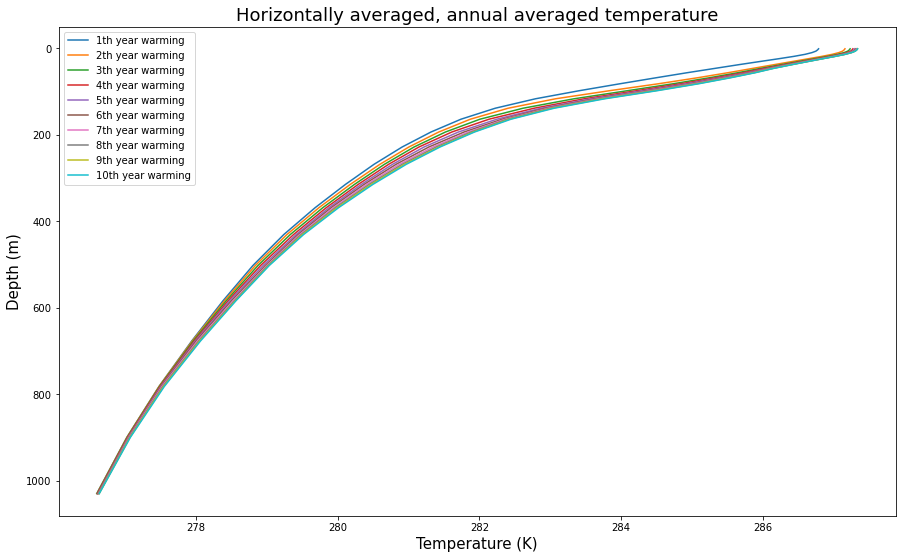

In [19]:
plt.figure(figsize=(15,9))

depth_index = 29

# plt.plot(temp_year1[0:depth_index], z[0:depth_index], label='First year average')
# plt.plot(temp_year2[0:depth_index], z[0:depth_index], label='Second year average')
# plt.plot(temp_year3[0:depth_index], z[0:depth_index], label='Third year average')
# plt.plot(temp_year3[0:depth_index], z[0:depth_index], label='Third year average')
# plt.plot(temp_year3[0:depth_index], z[0:depth_index], label='Third year average')
# plt.plot(temp_year10[0:depth_index], z[0:depth_index], label='Tenth year average')
# plt.plot(temp_year11[0:depth_index], z[0:depth_index], label='Eleventh year average')
# plt.plot(temp_year12[0:depth_index], z[0:depth_index], label='Twelfth year average')
# plt.plot(temp_year13[0:depth_index], z[0:depth_index], label='Thirteenth year average')
# plt.plot(temp_year20[0:depth_index], z[0:depth_index], label='Twentieth year average')
# plt.plot(temp_year30[0:depth_index], z[0:depth_index], label='Thirtieth year average')
# plt.plot(temp_year40[0:depth_index], z[0:depth_index], label='Fortieth year average')

for i in range(10):
    plt.plot(temp_cwcw_dict[years[1]].isel(time = slice(0+12*i,12+12*i)).mean('time').mean('xt_ocean').mean('yt_ocean')[:depth_index], z[:depth_index], label='%sth year warming' % (i+1))

plt.title('Horizontally averaged, annual averaged temperature', fontsize = 18)
plt.xlabel('Temperature (K)', fontsize=15)
plt.ylabel('Depth (m)', fontsize=15)

plt.legend()
plt.gca().invert_yaxis()
plt.savefig('10 years of warming')

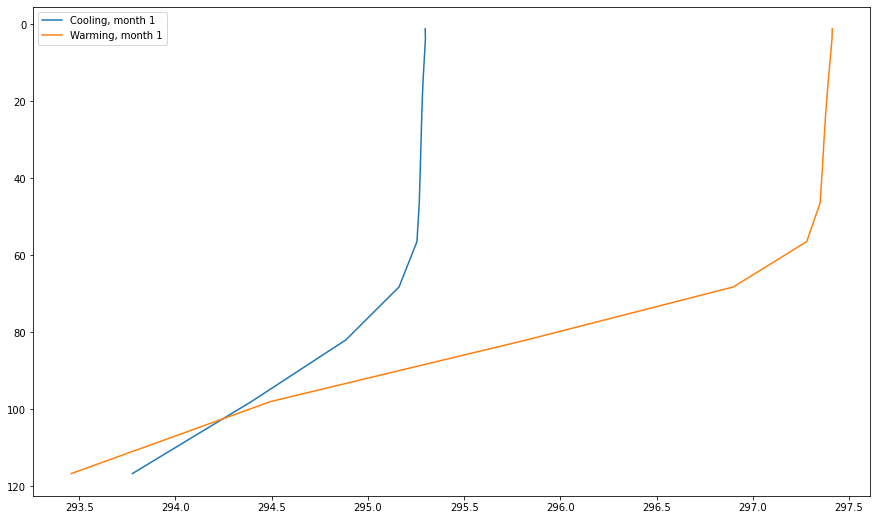

In [14]:
plt.figure(figsize=(15,9))

lat = 23
depth_index = 15

temp_month1 = temp_cwcw_dict[years[0]].isel(time = 12).mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
temp_month13 = temp_cwcw_dict[years[1]].isel(time = 12).mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year10 = temp_cwcw_dict[years[0]].isel(time = slice(0+12*9,12+12*9)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')
# temp_year11 = temp_cwcw_dict[years[1]].isel(time = slice(0+12*0,12+12*1)).mean('time').mean('xt_ocean').sel(yt_ocean=lat, method='nearest')

plt.plot(temp_month1[0:depth_index], z[0:depth_index],label='Cooling, month 1')
plt.plot(temp_month13[0:depth_index], z[0:depth_index], label='Warming, month 1')
plt.gca().invert_yaxis()
plt.legend()

In [217]:
# # Hovmoller

# temp_cwcw_values = list(temp_cwcw_dict.values())
# temp_cwcw_hovmoller = [temp_cwcw_values[i].mean('xt_ocean').mean('yt_ocean') for i in range(len(temp_cwcw_values))]

In [216]:
# plt.figure(figsize=(18,15))

# depth_index = 29
# t = np.linspace(2901,3050,1800)
# zz,tt = np.meshgrid(z[:depth_index],t)

# plt.contourf(tt,zz,temp_cwcw_hovmoller_anom[:,:depth_index],levels=200,cmap='coolwarm')
# plt.colorbar()
# plt.gca().invert_yaxis()

In [13]:
# # Plot temperature-depth profile

# fig, axs = plt.subplots(1,2, figsize=(18,9))
# axs[0].plot(temp_cwcw_zonal_ave_midlat_2900_01, z)
# axs[0].plot([270,300], [60,60], '--', color='gray')
# axs[0].set_title('Temperature profile, 35N, 2900_01')
# axs[0].set_xlabel('Temperature (K)')
# axs[0].set_ylabel('Depth (m)')
# axs[0].invert_yaxis()

# axs[1].plot(temp_cwcw_zonal_ave_midlat_3040_01, z)
# axs[1].plot([270,300], [60,60], '--', color='gray')
# axs[1].set_title('Temperature profile, 35N, 3040_01')
# axs[1].set_xlabel('Temperature (K)')
# axs[1].set_ylabel('Depth (m)')
# axs[1].invert_yaxis()